In [1]:
import numpy as np
import scipy.optimize
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Problem 1: Linear versus exponential growth (7 points)


In [2]:
areas = [460, 455, 460, 455, 470, 465, 464, 469, 471, 473, 475, 477, 483, 483, 
         486, 492, 498, 501, 513, 515, 513, 511, 512, 508, 511, 515, 519, 525, 
         528, 532, 536, 531, 536, 544, 548, 554, 561, 566, 570, 579, 580, 583, 
         582, 586, 582, 588, 584, 591, 599, 596, 600, 607, 609, 613, 622, 630, 
         638, 644, 648, 653, 657, 653, 652, 651, 657, 660, 657, 658, 663, 667, 
         659, 659, 670, 677, 690, 701, 704, 711, 722, 723]

In [3]:
times = np.arange(len(areas))

In recitation we fit an exponential growth curve to this function, and you should have gotten something like this below:

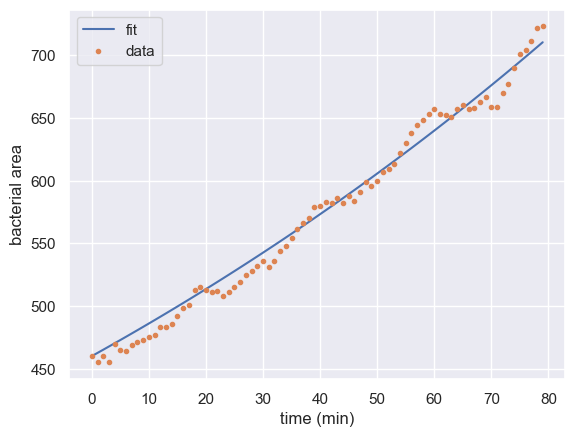

Let's now fit linear growth instead, where $A(t) = mt + b$.

## 1A. 

Below plot a guess at what parameters for $m$ and $b$ might be reasonable for this data. Plot your guess at the fit and the data on the same plot.

Text(0, 0.5, 'bacterial area')

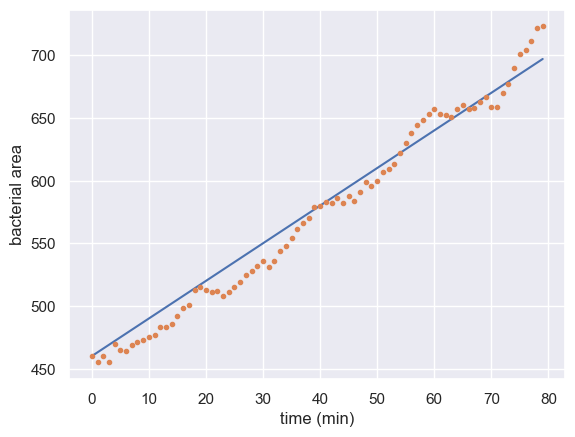

In [9]:
m = 3
b = areas[0]


fit = m * (times) + b 
plt.plot(times, fit)

plt.plot(times,areas, '.')
plt.xlabel("time (min)")
plt.ylabel('bacterial area')

## 1B.

Use `scipy.optimize` to fit the data for linear growth. For this, you will need to change the structure of the `chi_squared` function as well as your guess for your parameters.

In [12]:
def chi_linear(params, data, times):

    # unpacking parameters 
    m = params[0]
    b = params[1]
    
    # compute the fit 
    fit2 = (m * times) + b 
    
    # computing chi squared 
    vals_2 = (data - fit2) ** 2/ fit2 
    return np.sum(vals_2)

In [14]:
ans = scipy.optimize.minimize(chi_linear, [2.8, areas[0]], args=(areas,times),
                        bounds=[ (0, 5), (100, 1000)])

ans.x
best_m = ans.x[0]
best_b = ans.x[1]
ans.x

array([  3.298446  , 443.39765733])

## 1C. 

Plot the best linear fit over the data.

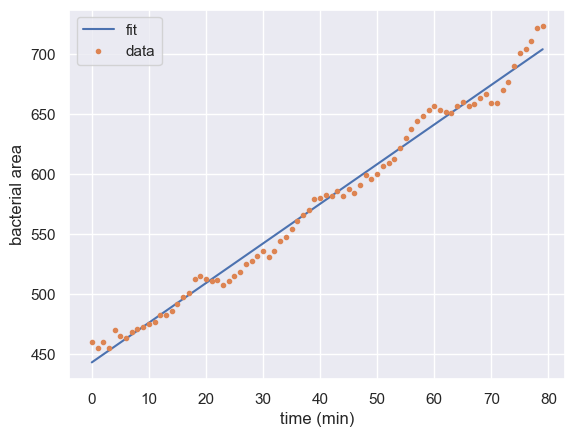

In [17]:
# compute the best fit 
best_fit = best_m * (times) + best_b 
plt.plot(times, best_fit)

# plot the data 
plt.plot(times, areas, '.') 

# label plot
plt.xlabel("time (min)")
plt.ylabel('bacterial area')
plt.legend(["fit","data"]);

## 1D.

From what you see, which do you think is a "better fit": linear or exponential growth? Explain your reasoning.  

Visually, I think the exponential growth is the better fit. I would be interested to recalculate the chi-squared values and compare that way.

## Problem 2: Beware of the standard deviation (6 points)

Below I include some "mock data" that we will explore.

In [18]:
mock_data = np.array([ 338, 189, 213, 2467, 518, 393, 1359, 399, 786,  106, 1452, 
                      262, 239, 250, 444, 387, 396, 872, 11, 865, 220, 400, 68, 
                      1136, 0, 25, 1186, 200, 870, 428, 1285, 791, 1172, 84, 672,  
                      674, 642, 571, 329, 288, 402, 1405, 262, 164, 3099, 4497, 
                      3785, 1543, 4152, 1645, 126, 1142, 1118, 408, 1723, 1677,  
                      791, 896, 404, 167, 1502, 1451, 709, 796, 46, 631, 148, 
                      1416, 2216, 1091, 179, 1308, 498, 1483, 643, 4927, 2146,
                      1864, 385, 198, 96, 900, 1848, 731, 1008, 1054, 799, 1318,
                      117, 24, 85, 3557, 159, 280, 271, 2693, 56, 2346, 33, 143])

## 2A. 

Use `np.mean()` and `np.std()` to get the mean and standard deviation of the `mock_data`.

In [19]:
np.mean(mock_data)

935.48

In [20]:
np.std(mock_data)

1002.2061512483347

## 2B. 

Now plot a histogram or ECDF of the `mock_data`. Do you think the mean and standard deviation are a meaningful way to describe the data? Why or why not?

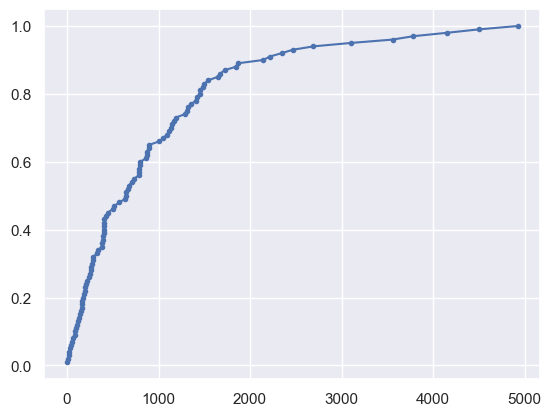

In [21]:
def ecdf(data):
    """Generate x and y values for plotting an ECDF."""
    x_vals = np.sort(data)
    y_vals = np.linspace(1/len(data), 1, len(data))

    return x_vals, y_vals

x, y = ecdf(mock_data)
plt.plot(x, y, '.-');

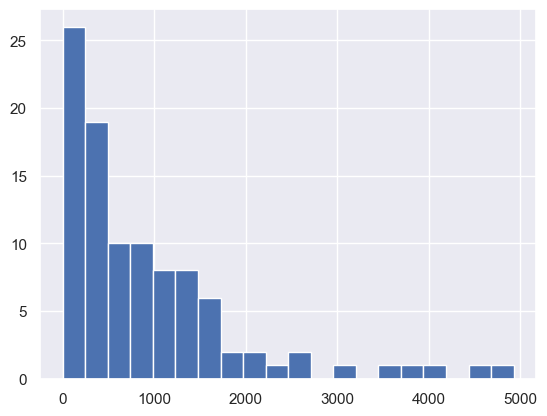

In [23]:
plt.hist(mock_data, bins = 20);

## 2C.

To drive the point home, use the mean and standard deviation from part A to plot the CDF of the corresponding normal distribution. For this, you can use `scipy.stats.norm.cdf(x, loc, scale)`, where `x` is a list or array of x-values you wish to get values for, `loc` is the mean, and `scale` is the standard deviation.

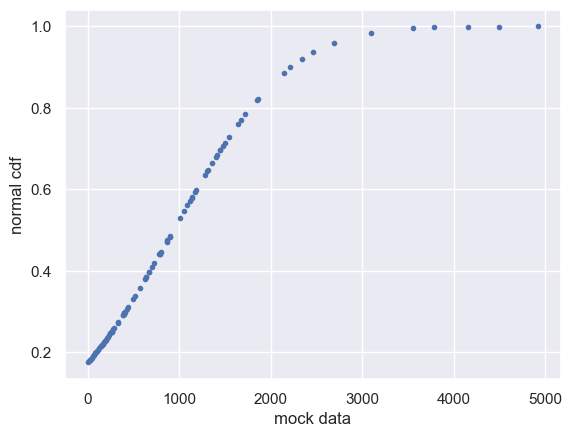

In [28]:
cdf_mock = scipy.stats.norm.cdf(mock_data, 935.48, 1002.2061512483347)
plt.plot(mock_data, cdf_mock, '.');
plt.xlabel("mock data")
plt.ylabel("normal cdf");

## 2D. 

Plot this normal distribution CDF and the ECDF of the data on the same graph. Explain why the mean and standard deviation you originally found fail to describe this data well.

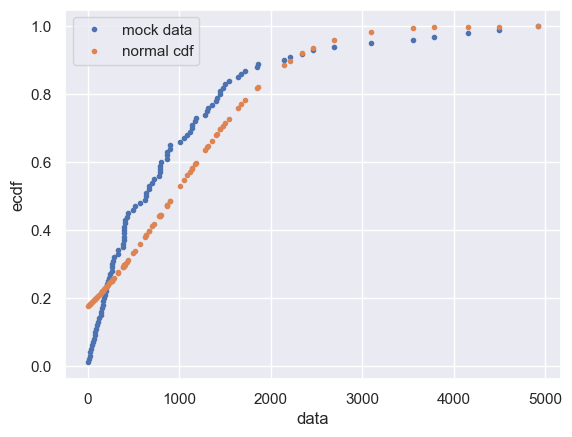

In [30]:
plt.plot(x, y, '.');
plt.plot(mock_data, cdf_mock, '.');
plt.legend(["mock data", "normal cdf"]);
plt.xlabel("data")
plt.ylabel("ecdf");

The original data's statistics fit to a normal distribution do not describe this data well. Almost 60% of the original data lies to the left of the mean as the data set has a right skew. The normal distribution assumes 50% of the data is on either side of the mean, which is inaccurate for these data.

# Problem 3: The probability distributions for describing kinesin walking (7 points)

For this, we will be exploring the data from [this paper](https://www.science.org/doi/epdf/10.1126/science.1093753) that first established how kinease "walks" along microtubules. [This now iconic video](https://www.youtube.com/watch?v=y-uuk4Pr2i8&ab_channel=EmmanuelDumont) demonstrates what is now known about kinesin walking "hand-over-hand". You don't need to read the paper in full to follow the analysis below, but make sure to look at the figures.

In Figure 1A, the authors demonstrate the two possible mechanisms by which kinesin can walk along a microtubule. In the "hand-over-hand" model a given kinesin head would be expected 16 nm at a time, while in the "inchworm" model the kinesin head would move just 8 nm at a time.

## 3A. 

From the data shown in Figure 2, which model of kinesin walking is better supported? Pay attention to the size of the "jumps" in position.

The hand-over-hand model is better supported as there is larger "jumps" in position than were predicted for the inchworm model. 

Now look at the data in Figure 3B. This data is best described by a [gamma distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html) which is distribution that we have not yet talked about, but it has a simple story: it's the time it takes for multiple Poisson processes to occur. So for our kinesin walking, we are interested in the time it takes for **two steps** to occur, resulting in the kinesin head of interest moving forward. 

Again, I include a reproduction of the data below.

In [78]:
# x_values
bin_times = np.linspace(0,9,27) 
# y_values
bin_counts = [21, 40, 52, 57, 55, 44, 32, 22, 17, 12, 8, 8, 5, 2, 2, 3, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1]

wait_times = []

# construct the data, with the x values repeated an appopriate number of times
for x, y in zip(bin_times, bin_counts):
    wait_times += [x]*y

# look at the final array
wait_times = np.array(wait_times)

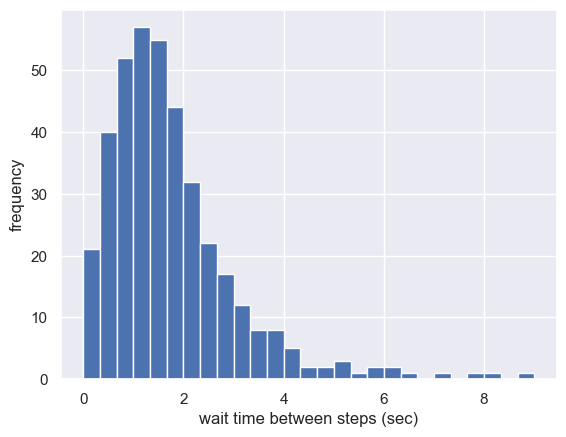

In [79]:
plt.hist(wait_times,bins=27);
plt.xlabel("wait time between steps (sec)")
plt.ylabel("frequency");

We will fit this data to a gamma distribution. When using the `scipy.stats.gamma.cdf` function, the inputs will be as follows: 

> `cdf(x, a, scale=???)`

where `x` are the x values for which we wish to get the corresponding CDF y values, `a` will be fixed to be 2 in this case for the two kinesin steps, and you will be fitting the `scale` parameters. The `scale` parameter here is defined as $1/\beta$, where $\beta$ is the rate at which the Poisson process occur. 

## 3B. 

To get a sense of a reasonable value for the `scale` parameter below, plot a "guess" at the fit, whit the gamma CDF plotted over the ECDF of the same. 

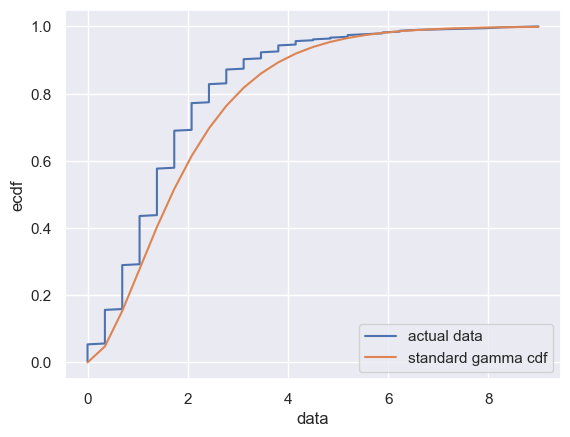

In [80]:
x_actual, y_actual = ecdf(wait_times)
gamma_cdf = scipy.stats.gamma.cdf(x_actual, 2, scale = 1)
# guess is .5? 
plt.plot(x_actual, y_actual);
plt.plot(x_actual, gamma_cdf);
plt.xlabel("data")
plt.ylabel("ecdf")
plt.legend(["actual data", "standard gamma cdf"]);

## 3C.

Write a chi-squared function for the gamma function below. You may want to make reference to the `chi_squared_normal` function from recitation for an example of how to write a chi-squared function for distributions.

**Note: `stats.gamma.cdf` will return values of zero here, which will then give us an error from dividing by zero. A temporary solution for now is to artificially add a very small amount (like 0.00001) to the CDF values to prevent us from dividing by zero. There are more proper ways of handling this which we will learn next week, but this will work for now without changing the final result of the optimization**.

In [85]:
def chi_squared_gamma(params, data):

    # unpack parameters
    scale = params[0]
    a = 2 
        #can change to params[1] if needed later

    # get x and y values for data
    x_data, y_data = ecdf(data) 

    # get "fit" y values
    y_fit = scipy.stats.gamma.cdf(x_data, a, scale = scale)
    y_fit = y_fit + .000001
    
    # compute chi-squared
    chi_squares = abs((y_data - y_fit)**2 )/ y_fit
    return chi_squares.sum()

## 3D. 

Now optimize your chi-squared function to find the best value for `scale` for this data.

In [86]:
ans = scipy.optimize.minimize(chi_squared_gamma, [.5], args=(x_actual),
                        bounds=[ (.001, 5) ] )

new_scale = ans.x[0]
ans.x

array([0.78027083])

## 3E.

Validate that your fitting worked well by plotting the CDF fit over the ECDF data. 

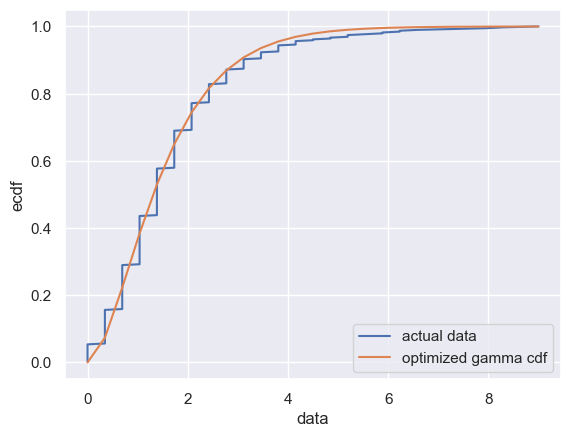

In [87]:
gamma_cdf_fit = scipy.stats.gamma.cdf(x_actual, 2, scale = new_scale)
plt.plot(x_actual, y_actual);
plt.plot(x_actual, gamma_cdf_fit);
plt.xlabel("data")
plt.ylabel("ecdf")
plt.legend(["actual data", "optimized gamma cdf"]);